<a href="https://colab.research.google.com/github/kiran20v/python/blob/master/Behaviour_cloning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!git clone https://github.com/kiran20v/python/

Cloning into 'python'...
remote: Enumerating objects: 14021, done.
remote: Total 14021 (delta 0), reused 0 (delta 0), pack-reused 14021
Receiving objects: 100% (14021/14021), 211.59 MiB | 36.87 MiB/s, done.
Resolving deltas: 100% (52/52), done.
Checking out files: 100% (13936/13936), done.


In [2]:
!ls python/track_self_drive

driving_log.csv  IMG


In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import keras
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Dropout, Flatten, Dense
from keras.optimizers import Adam
from  sklearn.utils import shuffle
from  sklearn.model_selection import train_test_split

import cv2
import pandas as pd
import ntpath
import random

Using TensorFlow backend.


In [4]:
datadir = 'python/track_self_drive'
columns = ['center', 'left', 'right', 'steering', 'throttle', 'reverse', 'speed']
data = pd.read_csv(os.path.join(datadir, 'driving_log.csv'), names=columns)
pd.set_option('display.max_colwidth', -1)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,/home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_47_904.jpg,/home/hanu/source/ai/track_self_drive/IMG/left_2019_12_10_01_36_47_904.jpg,/home/hanu/source/ai/track_self_drive/IMG/right_2019_12_10_01_36_47_904.jpg,0.0,0.0,0.0,0.000079
1,/home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_005.jpg,/home/hanu/source/ai/track_self_drive/IMG/left_2019_12_10_01_36_48_005.jpg,/home/hanu/source/ai/track_self_drive/IMG/right_2019_12_10_01_36_48_005.jpg,0.0,0.0,0.0,0.000079
2,/home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_105.jpg,/home/hanu/source/ai/track_self_drive/IMG/left_2019_12_10_01_36_48_105.jpg,/home/hanu/source/ai/track_self_drive/IMG/right_2019_12_10_01_36_48_105.jpg,0.0,0.0,0.0,0.000079
3,/home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_207.jpg,/home/hanu/source/ai/track_self_drive/IMG/left_2019_12_10_01_36_48_207.jpg,/home/hanu/source/ai/track_self_drive/IMG/right_2019_12_10_01_36_48_207.jpg,0.0,0.0,0.0,0.000079
4,/home/hanu/source/ai/track_self_drive/IMG/center_2019_12_10_01_36_48_307.jpg,/home/hanu/source/ai/track_self_drive/IMG/left_2019_12_10_01_36_48_307.jpg,/home/hanu/source/ai/track_self_drive/IMG/right_2019_12_10_01_36_48_307.jpg,0.0,0.0,0.0,0.000079


In [5]:
def path_leaf(path):
    head, tail = ntpath.split(path)
    return tail

data['center'] = data['center'].apply(path_leaf)
data['left'] = data['left'].apply(path_leaf)
data['right'] = data['right'].apply(path_leaf)
data.head()

,center,left,right,steering,throttle,reverse,speed
0,center_2019_12_10_01_36_47_904.jpg,left_2019_12_10_01_36_47_904.jpg,right_2019_12_10_01_36_47_904.jpg,0.0,0.0,0.0,0.000079
1,center_2019_12_10_01_36_48_005.jpg,left_2019_12_10_01_36_48_005.jpg,right_2019_12_10_01_36_48_005.jpg,0.0,0.0,0.0,0.000079
2,center_2019_12_10_01_36_48_105.jpg,left_2019_12_10_01_36_48_105.jpg,right_2019_12_10_01_36_48_105.jpg,0.0,0.0,0.0,0.000079
3,center_2019_12_10_01_36_48_207.jpg,left_2019_12_10_01_36_48_207.jpg,right_2019_12_10_01_36_48_207.jpg,0.0,0.0,0.0,0.000079
4,center_2019_12_10_01_36_48_307.jpg,left_2019_12_10_01_36_48_307.jpg,right_2019_12_10_01_36_48_307.jpg,0.0,0.0,0.0,0.000079


[-1.  -0.9 -0.8 -0.7 -0.6 -0.5 -0.4 -0.3 -0.2 -0.1  0.   0.1  0.2  0.3
  0.4  0.5  0.6  0.7  0.8  0.9  1. ]


-1.0

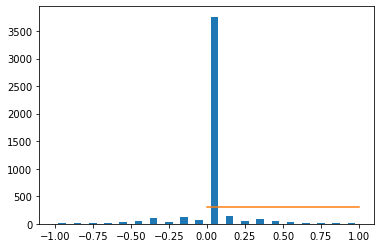

In [6]:
num_bins = 20
samples_per_bin = 300
hist, bins = np.histogram(data['steering'], num_bins)
center = (bins[:-1] + bins[1:]) * 0.5
print(bins)
plt.bar(center, hist, width=0.05)
plt.plot(np.min(data['steering']), np.max(data['steering']),(samples_per_bin, samples_per_bin))
np.min(data['steering'])

In [7]:
print('total data: ', len(data))
remove_list = []
for j in range(num_bins):
    bin_list = []
    for i in range(len(data['steering'])):
        if data['steering'][i] >= bins[j] and data['steering'][i] <= bins[j+1]:
            bin_list.append(i)
    bin_list = shuffle(bin_list)
    bin_list = bin_list[samples_per_bin:]
    remove_list.extend(bin_list)

print('removed',len(remove_list))
data.drop(data.index[remove_list], inplace=True)
print('remaining: ', len(data))

total data:  4633
removed 6912
remaining:  842


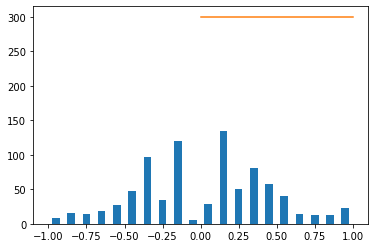

In [8]:
hist, _ = np.histogram(data['steering'], (num_bins))
plt.bar(center, hist, width=0.05)
plt.plot(np.min(data['steering']), np.max(data['steering']),(samples_per_bin, samples_per_bin))

In [0]:
def load_img_steering(datadir, df):
    image_path = []
    steering = []
    for i in range(len(data)):
        indexed_data = data.iloc[i]
        center, left, right, = indexed_data[0], indexed_data[1], indexed_data[2]
        image_path.append(os.path.join(datadir, center.strip()))
        steering.append(float(indexed_data[3]))
    image_paths = np.asarray(image_path)
    steerings = np.asarray(steering)
    return image_paths, steerings

image_paths, steerings = load_img_steering(datadir + '/IMG', data)

In [10]:
X_train, X_valid, y_train, y_valid = train_test_split(image_paths, steerings, test_size=0.2, random_state=6)
print('Training samples: ',X_train, X_valid, y_train, y_valid);

Training samples:  ['python/track_self_drive/IMG/center_2019_12_10_01_44_26_879.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_36_54_712.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_43_51_392.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_44_48_724.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_38_05_234.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_39_06_745.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_41_25_321.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_43_18_433.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_45_19_198.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_44_55_549.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_42_16_175.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_38_13_713.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_42_06_069.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_37_27_949.jpg'
 'python/track_self_drive/IMG/center_2019_12_10_01_41_29_

Text(0.5, 1.0, 'Validation set')

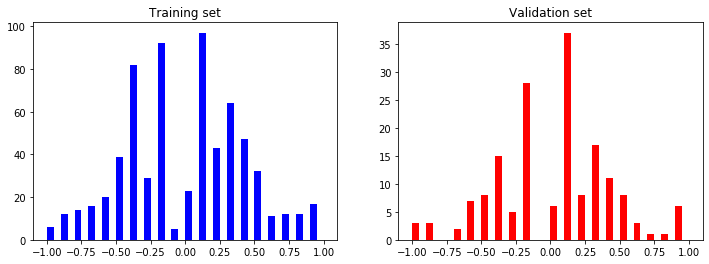

In [11]:
fig,axs = plt.subplots(1, 2, figsize=(12, 4))
axs[0].hist(y_train, bins=num_bins, width = 0.05, color='blue')
axs[0].set_title('Training set')
axs[1].hist(y_valid, bins=num_bins, width = 0.05, color='red')
axs[1].set_title('Validation set')

In [0]:
def img_preprocess(img):
    img = mpimg.imread(img)
    img = img[60:135, :, :] # strip top and bottom
    # img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)
    img = cv2.cvtColor(img, cv2.COLOR_RGB2YUV)
    img = cv2.GaussianBlur(img, (3, 3), 0) # 3x3 Kernal, 0-deviation
    cv2.resize(img, (200, 66)) # 200x66 - Matches NVIDEA
    img = img / 255
    return img

Text(0.5, 1.0, 'preprocessed image')

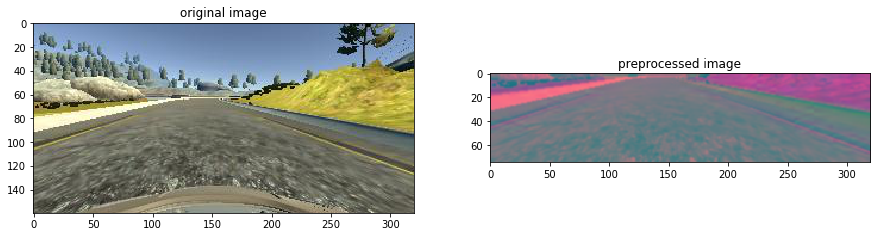

In [13]:
image_path = image_paths[100]
original_image = mpimg.imread(image_path)
preprocessed_image = img_preprocess(image_path)

fig, axs = plt.subplots(1, 2, figsize=(15, 10))
# fig.tight_layout()
axs[0].imshow(original_image)
axs[0].set_title('original image')
axs[1].imshow(preprocessed_image)
axs[1].set_title('preprocessed image')

In [0]:
X_train = np.array(list(map(img_preprocess, X_train)))
X_valid = np.array(list(map(img_preprocess, X_valid)))

(673, 75, 320, 3)


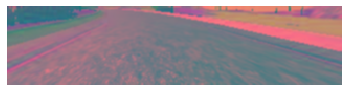

In [18]:
plt.imshow(X_train[random.randint(0, len(X_train) -1 )])
plt.axis('off')
print(X_train.shape)